Build a simple linear regression model by performing EDA and do necessary transformations and 
select the best model using R or Python.<br>
2) Salary_hike -> Build a prediction model for Salary_hike

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data1 = data.rename(columns={"YearsExperience":"YOE","Salary":"Sal"}) #Rename the columns for conveniance 
data1.head(2)


,YOE,Sal
0,1.1,39343.0
1,1.3,46205.0


In [5]:
data1.info() # Check for null & DataType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOE     30 non-null     float64
 1   Sal     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


there are no Null values in data & both columns having float data type

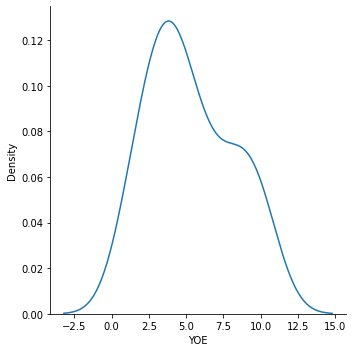

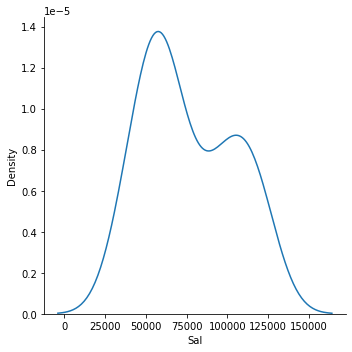

In [6]:
sns.displot(data1["YOE"],kind="kde")
sns.displot(data1["Sal"],kind="kde")

In [7]:
plt.show()

Both columns are some what right skewed data

In [8]:
print(stats.kurtosis(data1["YOE"]))
print(stats.kurtosis(data1["Sal"]))

-1.0447521989892943
-1.2829125042427751


Both columns are having negative kurosis , means both are having Platykurtic Distribution

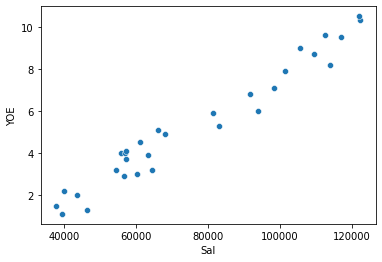

In [9]:
sns.scatterplot(x= data1["Sal"],y=data1["YOE"]) #To check Correlation 
plt.show()

In [10]:
data1.corr() #To quantify the how much linear relation between Sal & YOE

,YOE,Sal
YOE,1.000000,0.978242
Sal,0.978242,1.000000


By seeinn Scatter plot & r = 0.97, we can say that there is strong correlation between Year of Experiane & Salary

# Creating The Model

In [11]:
model = smf.ols(formula="Sal~YOE",data=data1) #Create model
model = model.fit() #Training

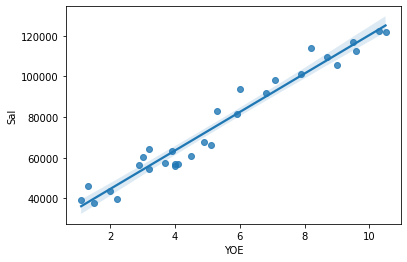

In [12]:
sns.regplot(x="YOE",y="Sal",data=data1)
plt.show()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        13:47:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YOE         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params # TO Check Intercept(B0) & coefficient of YOE(B1)

Intercept    25792.200199
YOE           9449.962321
dtype: float64

In [15]:
model.pvalues # to chech Pvalues

Intercept    5.511950e-12
YOE          1.143068e-20
dtype: float64

as the YOE is having pvalue equal to zero we can say that YOE is good Predictor for Salary

In [16]:
model.rsquared # Model can explain upto 95%

0.9569566641435086

# Predicting Salary hike for New year of Experiance

In [17]:
new_yoe = pd.DataFrame(pd.Series([3,4]),columns=["YOE"])

In [18]:
model.predict(new_yoe)

0    54142.087163
1    63592.049484
dtype: float64

* for 3 Year of Experiance there will be 54142,08 Salary hike
* for 4 Year of Experiance there will be 63592.04 Salary hike